# MergeSort MPI Weak Scaling Anaylisis

In [1]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all the files

In [2]:
tk = th.Thicket.from_caliperreader(glob("/scratch/user/nebiyou/MergeSort_MPI/mpi_cali_files/*.cali"))
tk.dataframe = tk.dataframe.drop(["spot.channel"], axis=1)
tk.dataframe = tk.dataframe.drop(["Min time/rank"],axis=1)
tk.dataframe = tk.dataframe.drop(["Max time/rank"],axis=1)
tk.dataframe = tk.dataframe.drop(["Total time"],axis=1)
tk.dataframe = tk.dataframe.drop(["Variance time/rank"],axis=1)
tk.dataframe = tk.dataframe.drop(["nid"],axis=1)

In [3]:
# Performance data
tk.dataframe

Avg time/rank  \
node                                              profile                     
{'name': 'main', 'type': 'function'}              42739696         1.186452   
                                                  59665529         1.437257   
                                                  72101741         0.547006   
                                                  88202097         8.637119   
                                                  102807250       25.040028   
                                                  110074952       11.918560   
                                                  125253266        9.011499   
                                                  160627910       13.169718   
                                                  185888061        1.725023   
                                                  187294079        3.420556   
                                                  191295384        5.320546   
                                                  218466728        0.735613   
                                                  239730211        5.550197   
                                                  251257438       89.631330   
                                                  257775197       11.299940   
                                                  258750093       11.466888   
                                                  269219114        1.406387   
                                                  354306525       82.932470   
                                                  358001718       30.353882   
                                                  389635775        7.553442   
                                                  391519403        1.744439   
                                                  405588082        0.449437   
                                                  410568479        3.486854   
                                                  419616365        1.831510   
                                                  425013929       41.302861   
                                                  428557155       48.730003   
                                                  440742960        0.545568   
                                                  447610297        0.809140   
                                                  452995826        0.734131   
                                                  468034945        3.676098   
                                                  489801814       54.953876   
                                                  495232803        3.593954   
                                                  497333985        0.379690   
                                                  509599190        1.655387   
                                                  530083172       10.812660   
                                                  537492491        8.378189   
                                                  552091568       20.777476   
                                                  579517497        0.523612   
                                                  590411055        9.481257   
                                                  592916818        1.453933   
                                                  599074545        4.263751   
                                                  603395526        1.764256   
                                                  612214751        1.410349   
                                                  624890955        8.722172   
                                                  641773966        1.444060   
                                                  661075766        0.970177   
                                                  663842924        4.479973   
                                                  684997695      613.671199   
                                                  697914229        3.898327   
                                 

In [4]:
#Printing Thicket Tree
tk.statsframe.dataframe["time"] = 1
print(tk.tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

1.000 main
└─ 1.000 whole_computation
   ├─ 1.000 check_correctness
   ├─ 1.000 comm
   │  ├─ 1.000 comm_gather
   │  └─ 1.000 comm_scatter
   ├─ 1.000 comp
   │  ├─ 1.000 comp_large
   │  └─ 1.000 comp_small
   └─ 1.000 data_init

Legend (Metric: time Min: 1.00 Max: 1.00)
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [5]:
tk.metadata

cali.caliper.version  mpi.world.size  \
profile                                           
42739696             2.11.0-dev               2   
59665529             2.11.0-dev              16   
72101741             2.11.0-dev               2   
88202097             2.11.0-dev             256   
102807250            2.11.0-dev               4   
110074952            2.11.0-dev            1024   
125253266            2.11.0-dev             256   
160627910            2.11.0-dev            1024   
185888061            2.11.0-dev             256   
187294079            2.11.0-dev               8   
191295384            2.11.0-dev              32   
218466728            2.11.0-dev              16   
239730211            2.11.0-dev              64   
251257438            2.11.0-dev            1024   
257775197            2.11.0-dev            1024   
258750093            2.11.0-dev            1024   
269219114            2.11.0-dev              32   
354306525            2.11.0-dev               2   
358001718            2.11.0-dev               4   
389635775            2.11.0-dev              16   
391519403            2.11.0-dev              64   
405588082            2.11.0-dev               4   
410568479            2.11.0-dev             256   
419616365            2.11.0-dev              64   
425013929            2.11.0-dev               4   
428557155            2.11.0-dev             512   
440742960            2.11.0-dev               2   
447610297            2.11.0-dev              16   
452995826            2.11.0-dev               8   
468034945            2.11.0-dev             256   
489801814            2.11.0-dev               2   
495232803            2.11.0-dev              32   
497333985            2.11.0-dev               4   
509599190            2.11.0-dev             256   
530083172            2.11.0-dev             128   
537492491            2.11.0-dev             512   
552091568            2.11.0-dev            1024   
579517497            2.11.0-dev               8   
590411055            2.11.0-dev             512   
592916818            2.11.0-dev              32   
599074545            2.11.0-dev             512   
603395526            2.11.0-dev             256   
612214751            2.11.0-dev              32   
624890955            2.11.0-dev             128   
641773966            2.11.0-dev             128   
661075766            2.11.0-dev               4   
663842924            2.11.0-dev             256   
684997695            2.11.0-dev              32   
697914229            2.11.0-dev              64   
710224619            2.11.0-dev               8   
750830333            2.11.0-dev              32   
756540769            2.11.0-dev             256   
761496304            2.11.0-dev              16   
776404260            2.11.0-dev              16   
797890592            2.11.0-dev              16   
823029428            2.11.0-dev              32   
867400632            2.11.0-dev               4   
877707651            2.11.0-dev              64   
901461663            2.11.0-dev               4   
918606785            2.11.0-dev               2   
940545161            2.11.0-dev              32   
977610368            2.11.0-dev             256   
980239941            2.11.0-dev               4   
985097120            2.11.0-dev               4   
986280200            2.11.0-dev               4   
997038919            2.11.0-dev              16   
1004697719           2.11.0-dev              32   
1034521171           2.11.0-dev               8   
1077057323           2.11.0-dev             256   
1104259535           2.11.0-dev              16   
1113844996           2.11.0-dev               8   
1117379601           2.11.0-dev              64   
1131309063           2.11.0-dev             128   
1140334860           2.11.0-dev             512   
1148740482           2.11.0-dev             256   
1155936974           2.11.0-dev             512   
1161173603           2.11.0-dev  

In [6]:
gb = tk.groupby(["InputType", "InputSize"])

28  thickets created...
{('1%%perturbed', 65536): <thicket.thicket.Thicket object at 0x2b4c27f3a640>, ('1%%perturbed', 262144): <thicket.thicket.Thicket object at 0x2b4c27fcc9a0>, ('1%%perturbed', 1048576): <thicket.thicket.Thicket object at 0x2b4c27f21f40>, ('1%%perturbed', 4194304): <thicket.thicket.Thicket object at 0x2b4c27e5c3d0>, ('1%%perturbed', 16777216): <thicket.thicket.Thicket object at 0x2b4c27ffc670>, ('1%%perturbed', 67108864): <thicket.thicket.Thicket object at 0x2b4c28076c70>, ('1%%perturbed', 268435456): <thicket.thicket.Thicket object at 0x2b4c27fe6190>, ('Random', 65536): <thicket.thicket.Thicket object at 0x2b4c2808b850>, ('Random', 262144): <thicket.thicket.Thicket object at 0x2b4c27f50610>, ('Random', 1048576): <thicket.thicket.Thicket object at 0x2b4c27fbf880>, ('Random', 4194304): <thicket.thicket.Thicket object at 0x2b4c27fa9730>, ('Random', 16777216): <thicket.thicket.Thicket object at 0x2b4c28125c70>, ('Random', 67108864): <thicket.thicket.Thicket object at 0

Compose these 3 groups column-wise to get a holistic view of the data

In [7]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_procs"
)

In [8]:
ctk.dataframe

(1%%perturbed, 65536)  \
                                                                    Avg time/rank   
node                                              num_procs                         
{'name': 'main', 'type': 'function'}              2                      0.547006   
                                                  4                      0.361429   
                                                  8                      0.482788   
                                                  16                     0.735613   
                                                  32                     1.355289   
                                                  64                     1.305305   
                                                  128                    1.445647   
                                                  256                    1.655387   
                                                  512                    4.114885   
                                                  1024                  11.991085   
{'name': 'whole_computation', 'type': 'function'} 2                      0.009630   
                                                  4                      0.008604   
                                                  8                      0.004534   
                                                  16                     0.004348   
                                                  32                     0.024835   
                                                  64                     0.020230   
                                                  128                    0.036482   
                                                  256                    0.029670   
                                                  512                    0.084136   
                                                  1024                   0.741465   
{'name': 'check_correctness', 'type': 'function'} 2                      0.000192   
                                                  4                      0.000193   
                                                  8                      0.000206   
                                                  16                     0.000208   
                                                  32                     0.000239   
                                                  64                     0.000228   
                                                  128                    0.000226   
                                                  256                    0.000230   
                                                  512                    0.000474   
                                                  1024                   0.001000   
{'name': 'comm', 'type': 'function'}              2                      0.000944   
                                                  4                      0.003158   
                                                  8                      0.000871   
                                                  16                     0.001763   
                                                  32                     0.022822   
                                                  64                     0.018398   
                                                  128                    0.034768   
                                                  256                    0.028028   
                                                  512                    0.082309   
                                                  1024                   0.739346   
{'name': 'comm_gather', 'type': 'function'}       2                      0.000464   
                                                  4                      0.000384   
                                                  8                      0.000400   
                                                  16                     0.000203   
                                                  32             

Perform pandas operations to get the table in a desirable format for plotting

In [9]:
# Drop unwanted columns
#ctk.dataframe = ctk.dataframe.reset_index().drop([("node", ""), (("1%%perturbed",65536), "nid"), (("1%%perturbed",65536),"Min time/rank"), (("1%%perturbed",65536),"Max time/rank"), (("1%%perturbed",65536),"Total time"), (("1%%perturbed",65536),"Variance time/rank"), (("Random",65536),"nid"), (("Random",65536),"Min time/rank"), (("Random",65536),"Max time/rank"), (("Random",65536),"Total time"), (("Random",65536),"Variance time/rank"),(("Sorted",65536),"nid"),(("Sorted",65536),"Min time/rank"), (("Sorted",65536),"Max time/rank"), (("Sorted",65536),"Total time"), (("Sorted",65536),"Variance time/rank"),(("ReverseSorted",65536),"nid"),(("ReverseSorted",65536),"Min time/rank"), (("ReverseSorted",65536),"Max time/rank"), (("ReverseSorted",65536),"Total time"), (("ReverseSorted",65536),"Variance time/rank") ], axis=1)
#ctk.dataframe = ctk.dataframe.reset_index().drop([(("1%%perturbed",262144), "nid"), (("1%%perturbed",262144),"Min time/rank"), (("1%%perturbed",262144),"Max time/rank"), (("1%%perturbed",262144),"Total time"), (("1%%perturbed",262144),"Variance time/rank"), (("Random",262144),"nid"), (("Random",262144),"Min time/rank"), (("Random",262144),"Max time/rank"), (("Random",262144),"Total time"), (("Random",262144),"Variance time/rank"),(("Sorted",262144),"nid"),(("Sorted",262144),"Min time/rank"), (("Sorted",262144),"Max time/rank"), (("Sorted",262144),"Total time"), (("Sorted",262144),"Variance time/rank"),(("ReverseSorted",262144),"nid"),(("ReverseSorted",262144),"Min time/rank"), (("ReverseSorted",262144),"Max time/rank"), (("ReverseSorted",262144),"Total time"), (("ReverseSorted",262144),"Variance time/rank") ], axis=1)
#ctk.dataframe = ctk.dataframe.reset_index().drop([(("1%%perturbed",1048576), "nid"), (("1%%perturbed",1048576),"Min time/rank"), (("1%%perturbed",1048576),"Max time/rank"), (("1%%perturbed",1048576),"Total time"), (("1%%perturbed",1048576),"Variance time/rank"), (("Random",1048576),"nid"), (("Random",1048576),"Min time/rank"), (("Random",1048576),"Max time/rank"), (("Random",1048576),"Total time"), (("Random",1048576),"Variance time/rank"),(("Sorted",1048576),"nid"),(("Sorted",1048576),"Min time/rank"), (("Sorted",1048576),"Max time/rank"), (("Sorted",1048576),"Total time"), (("Sorted",1048576),"Variance time/rank"),(("ReverseSorted",1048576),"nid"),(("ReverseSorted",1048576),"Min time/rank"), (("ReverseSorted",1048576),"Max time/rank"), (("ReverseSorted",1048576),"Total time"), (("ReverseSorted",1048576),"Variance time/rank") ], axis=1)
#ctk.dataframe = ctk.dataframe.drop([("index","")], axis=1)

ctk.dataframe = ctk.dataframe.reset_index().drop([("node", "")], axis=1)
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])


In [10]:
ctk.dataframe

(1%%perturbed, 65536) (1%%perturbed, 262144)  \
                                    Avg time/rank          Avg time/rank   
name              num_procs                                                
main              2                      0.547006               0.782014   
                  4                      0.361429               0.613585   
                  8                      0.482788               0.495163   
                  16                     0.735613               0.742205   
                  32                     1.355289               1.382019   
                  64                     1.305305               1.308419   
                  128                    1.445647               1.464932   
                  256                    1.655387               1.710395   
                  512                    4.114885               4.172725   
                  1024                  11.991085              11.877650   
whole_computation 2                      0.009630               0.051771   
                  4                      0.008604               0.027393   
                  8                      0.004534               0.015442   
                  16                     0.004348               0.011828   
                  32                     0.024835               0.039649   
                  64                     0.020230               0.013778   
                  128                    0.036482               0.049046   
                  256                    0.029670               0.079774   
                  512                    0.084136               0.169463   
                  1024                   0.741465               0.825897   
check_correctness 2                      0.000192               0.000743   
                  4                      0.000193               0.000749   
                  8                      0.000206               0.000751   
                  16                     0.000208               0.000751   
                  32                     0.000239               0.000809   
                  64                     0.000228               0.000806   
                  128                    0.000226               0.000809   
                  256                    0.000230               0.000819   
                  512                    0.000474               0.001604   
                  1024                   0.001000               0.003213   
comm              2                      0.000944               0.010854   
                  4                      0.003158               0.004469   
                  8                      0.000871               0.000986   
                  16                     0.001763               0.001351   
                  32                     0.022822               0.031508   
                  64                     0.018398               0.006669   
                  128                    0.034768               0.042471   
                  256                    0.028028               0.073366   
                  512                    0.082309               0.160459   
                  1024                   0.739346               0.816149   
comm_gather       2                      0.000464               0.001356   
                  4                      0.000384               0.001045   
                  8                      0.000400               0.000250   
                  16                     0.000203               0.000281   
                  32                     0.001450               0.001981   
                  64                     0.000093               0.001825   
                  128                    0.000200               0.002567   
                  256                    0.000196               0.000175   
                  512                    0.000244               0.000225   
                  1024                   0.002326               0.000857   


In [11]:
# Define common variables
function_names = set(ctk.dataframe.index.get_level_values("name"))
threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_procs"))))
inputsizes = sorted(list(set(tk.metadata["InputSize"].to_list())))
inputtypes = sorted(list(set(tk.metadata["InputType"].to_list())))

In [12]:
ctk.dataframe

(1%%perturbed, 65536) (1%%perturbed, 262144)  \
                                    Avg time/rank          Avg time/rank   
name              num_procs                                                
main              2                      0.547006               0.782014   
                  4                      0.361429               0.613585   
                  8                      0.482788               0.495163   
                  16                     0.735613               0.742205   
                  32                     1.355289               1.382019   
                  64                     1.305305               1.308419   
                  128                    1.445647               1.464932   
                  256                    1.655387               1.710395   
                  512                    4.114885               4.172725   
                  1024                  11.991085              11.877650   
whole_computation 2                      0.009630               0.051771   
                  4                      0.008604               0.027393   
                  8                      0.004534               0.015442   
                  16                     0.004348               0.011828   
                  32                     0.024835               0.039649   
                  64                     0.020230               0.013778   
                  128                    0.036482               0.049046   
                  256                    0.029670               0.079774   
                  512                    0.084136               0.169463   
                  1024                   0.741465               0.825897   
check_correctness 2                      0.000192               0.000743   
                  4                      0.000193               0.000749   
                  8                      0.000206               0.000751   
                  16                     0.000208               0.000751   
                  32                     0.000239               0.000809   
                  64                     0.000228               0.000806   
                  128                    0.000226               0.000809   
                  256                    0.000230               0.000819   
                  512                    0.000474               0.001604   
                  1024                   0.001000               0.003213   
comm              2                      0.000944               0.010854   
                  4                      0.003158               0.004469   
                  8                      0.000871               0.000986   
                  16                     0.001763               0.001351   
                  32                     0.022822               0.031508   
                  64                     0.018398               0.006669   
                  128                    0.034768               0.042471   
                  256                    0.028028               0.073366   
                  512                    0.082309               0.160459   
                  1024                   0.739346               0.816149   
comm_gather       2                      0.000464               0.001356   
                  4                      0.000384               0.001045   
                  8                      0.000400               0.000250   
                  16                     0.000203               0.000281   
                  32                     0.001450               0.001981   
                  64                     0.000093               0.001825   
                  128                    0.000200               0.002567   
                  256                    0.000196               0.000175   
                  512                    0.000244               0.000225   
                  1024                   0.002326               0.000857   


# Plotting (From the lab 1 example)

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [13]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
    )
    legend = plot.legend(loc='upper center', fontsize='x-small')
    return plot

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [14]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(matrix_sizes)
    plt.grid(True)
    plt.yscale("log", base=2)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

# Graphs

In [15]:
ctk.dataframe.loc["main"]

(1%%perturbed, 65536) (1%%perturbed, 262144)  \
                  Avg time/rank          Avg time/rank   
num_procs                                                
2                      0.547006               0.782014   
4                      0.361429               0.613585   
8                      0.482788               0.495163   
16                     0.735613               0.742205   
32                     1.355289               1.382019   
64                     1.305305               1.308419   
128                    1.445647               1.464932   
256                    1.655387               1.710395   
512                    4.114885               4.172725   
1024                  11.991085              11.877650   

          (1%%perturbed, 1048576) (1%%perturbed, 4194304)  \
                    Avg time/rank           Avg time/rank   
num_procs                                                   
2                        0.661920                1.186452   
4                        0.449437                0.760149   
8                        0.540384                0.734131   
16                       0.809140                0.918927   
32                       1.346769                1.453933   
64                       1.356965                1.538719   
128                      1.451187                2.244998   
256                      1.725023                1.794228   
512                      9.932337                4.204514   
1024                    17.739023               11.918560   

          (1%%perturbed, 16777216) (1%%perturbed, 67108864)  \
                     Avg time/rank            Avg time/rank   
num_procs                                                     
2                         3.486069                13.221969   
4                         2.029856                 7.451984   
8                         1.501207                 4.744834   
16                        1.437257                 3.631300   
32                        1.879893                 3.593954   
64                        2.077337                 4.665945   
128                       1.938581                 3.381363   
256                       9.920637                 8.517678   
512                       9.481257                25.094797   
1024                     23.033615                58.208113   

          (1%%perturbed, 268435456) (Random, 65536) (Random, 262144)  \
                      Avg time/rank   Avg time/rank    Avg time/rank   
num_procs                                                              
2                         54.900959        0.983937         3.110145   
4                         30.353882        0.806365         3.083509   
8                         18.394919        0.922180         3.410427   
16                        12.715471        1.729705         4.391016   
32                        10.358696        1.827158         4.709181   
64                         9.101424        1.852840         1.760988   
128                        8.565136        2.013744         8.722172   
256                        9.448221        2.339794         1.717491   
512                       46.480954        4.220244         4.139422   
1024                      99.317178       11.348852        11.466888   

          (Random, 1048576) (Random, 4194304) (Random, 16777216)  \
              Avg time/rank     Avg time/rank      Avg time/rank   
num_procs                                                          
2                 15.610030         82.932470         528.292221   
4                 16.810177         99.706907         540.631660   
8                 17.024238        104.308746         571.420315   
16                19.170631        112.735997         566.951800   
32                21.041856        110.198250         613.671199   
64                 1.367627          1.530279           2.034503   
128                1.474693          1.773019           2.646933   
256                1.684

In [19]:
#Weak Scaling

/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


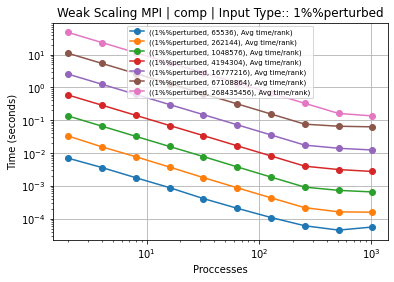

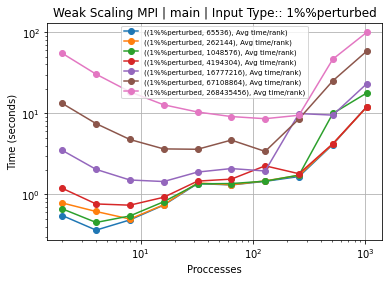

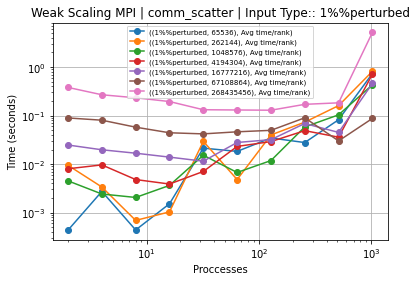

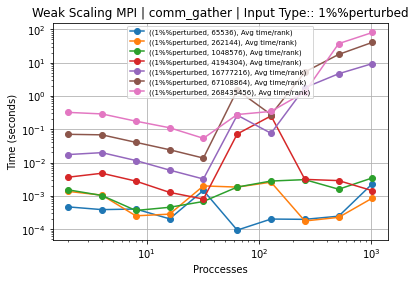

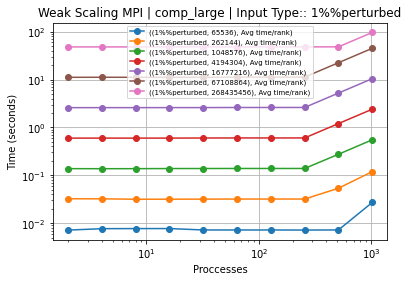

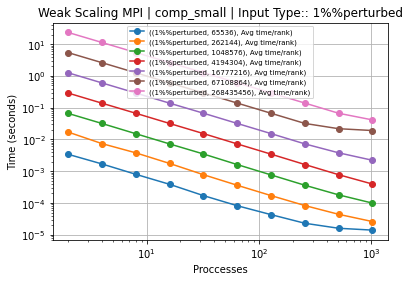

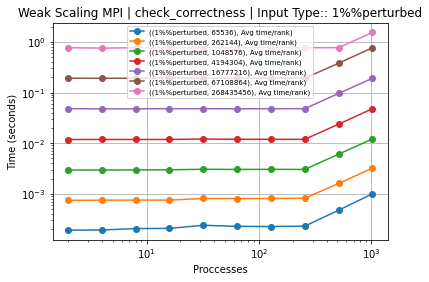

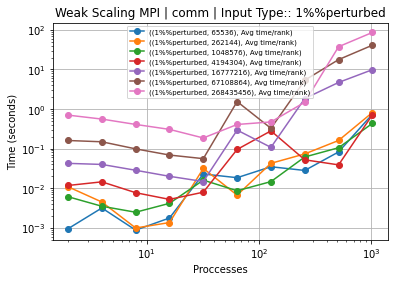

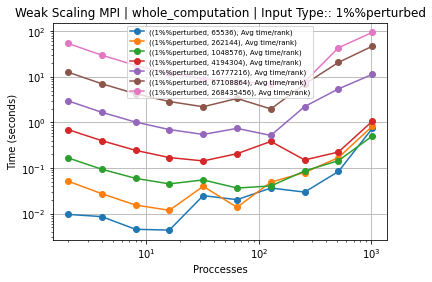

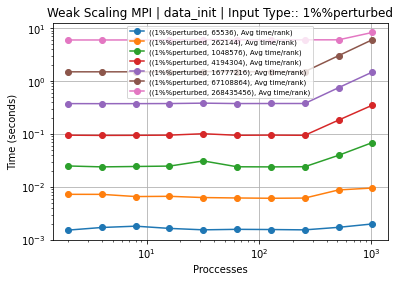

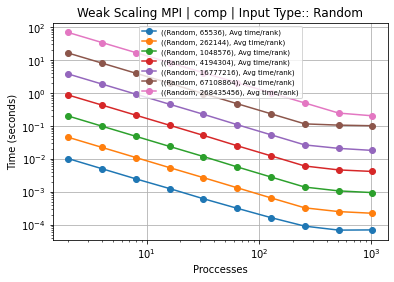

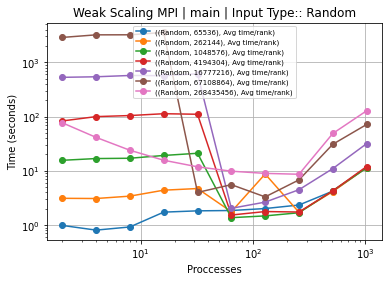

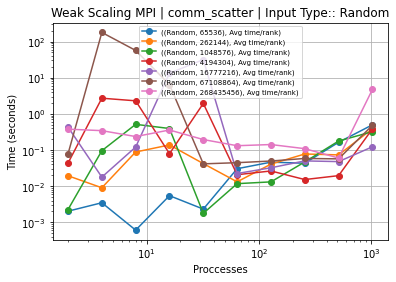

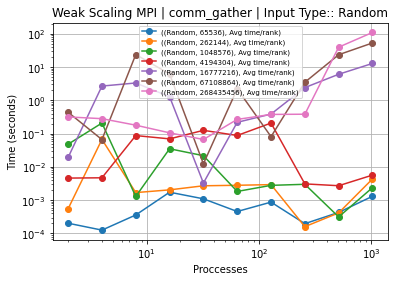

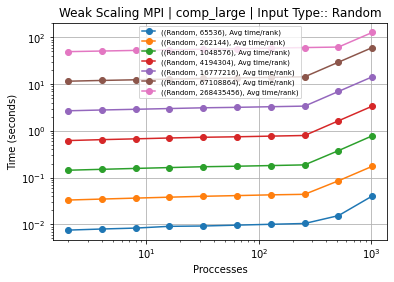

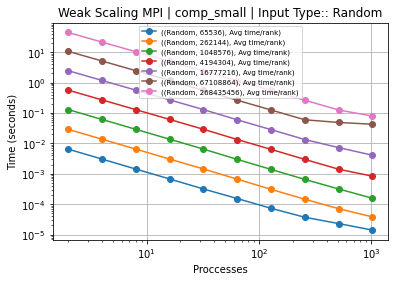

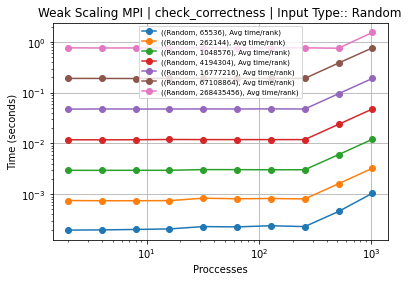

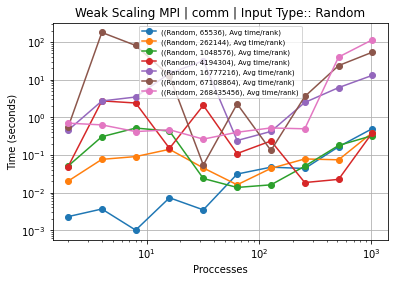

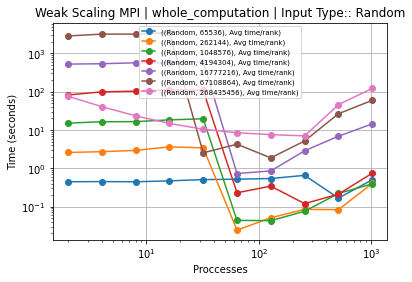

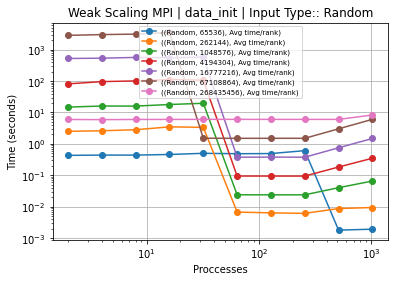

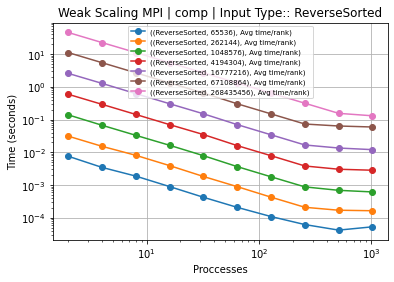

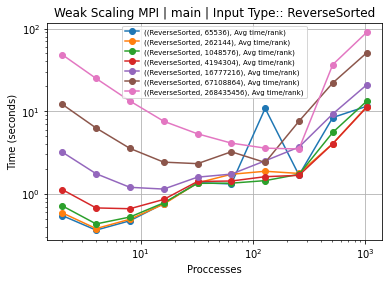

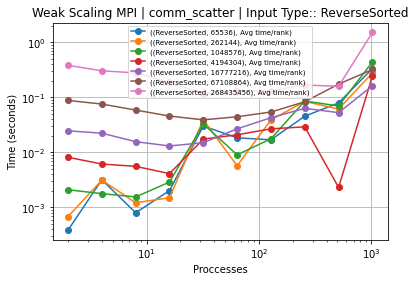

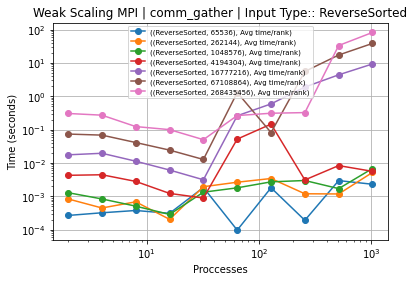

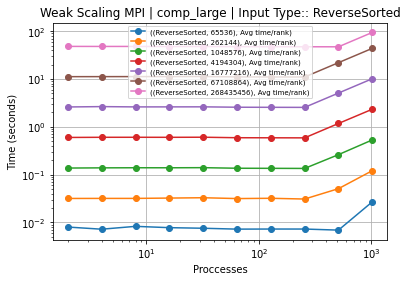

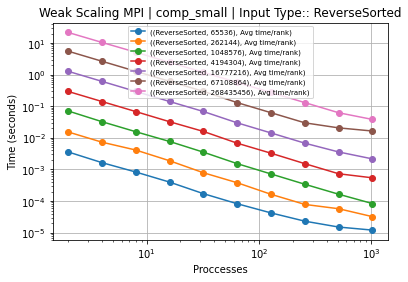

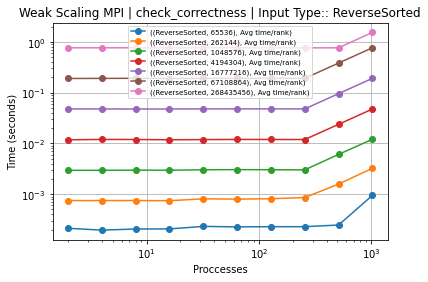

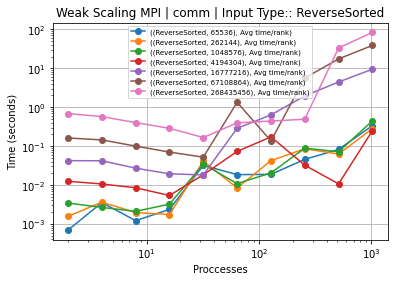

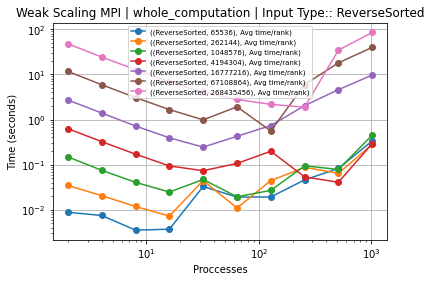

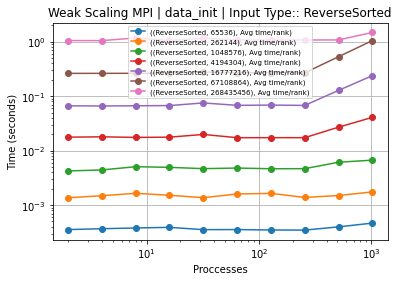

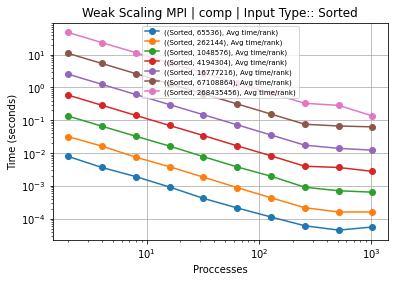

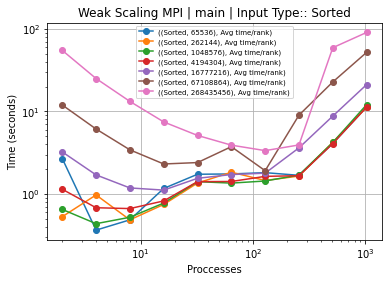

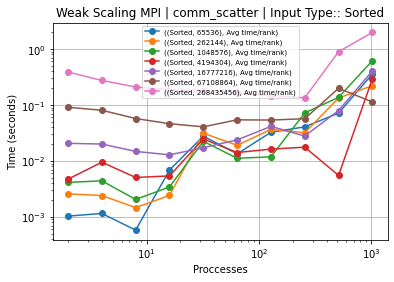

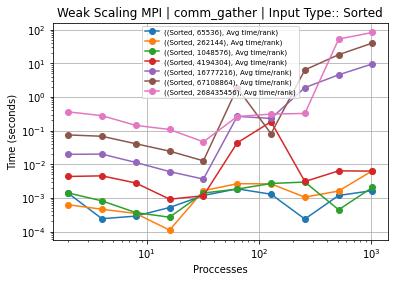

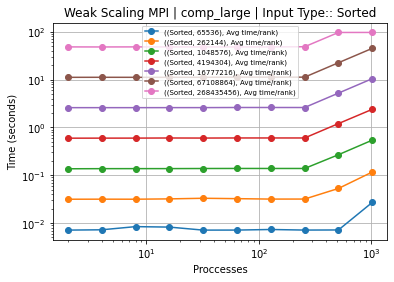

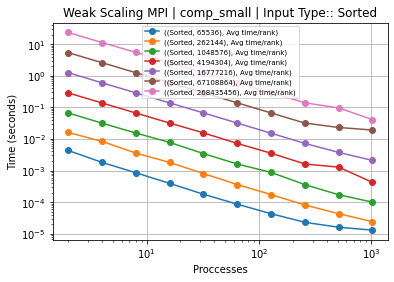

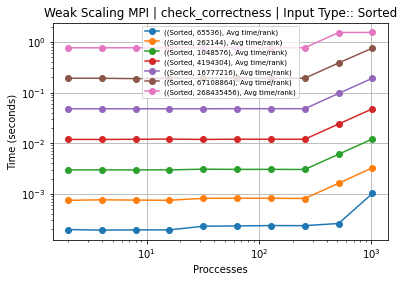

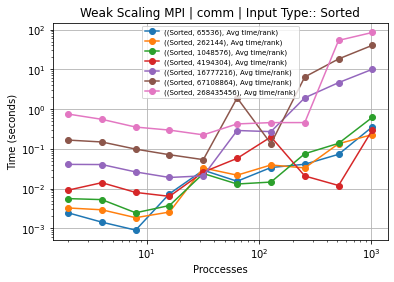

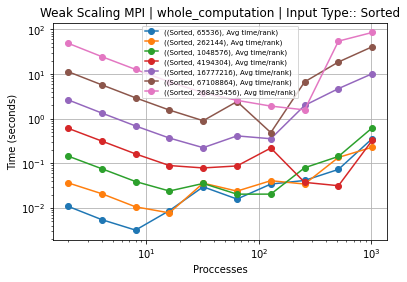

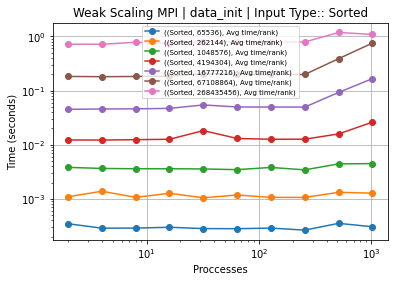

In [16]:
#Plotting Weak Scaling
for intype in inputtypes:
    cols = [(inputsize, "Avg time/rank") for inputsize in ctk.dataframe.columns.get_level_values(0) if inputsize[0] == intype]
    test = ctk.dataframe[cols]
    for name in function_names:
        plot_pandas(
            df=test.loc[name],
            title=f"Weak Scaling MPI | {name} | Input Type:: {intype}",
            xlabel="Proccesses",
            ylabel="Time (seconds)",
            loglog=True
        )